**Gradient Descent and Stochastic GD**

In [3]:
import pandas as pd
import tensorflow as tf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [4]:
df = pd.read_csv("/content/homeprices_banglore.csv")
df.sample(5)

,area,bedrooms,price
16,1180,3,48.0
2,1440,3,62.0
10,1800,3,82.0
11,2785,4,140.0
14,2250,3,101.0


Data scaling

In [5]:
# x = area and bedrooms
# y = price

from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price',axis='columns')) #drop price column and scale area and bedrooms
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1)) #scale price column

In [6]:
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [7]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [8]:
#after scaling, it gets converted to 2d numpy array, we have to turn it back to 1d numpy array
scaled_y.reshape(20,)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

### **1. Apply batch gradient descent** <br>
works for all samples of training data

price = w1 * area + w2 * bedrooms + bias

In [9]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features.
    # here, our case number_of_features = 2 (area, bedroom)

    #initialise weights=1 and bias=0
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0] # number of rows in X

    cost_list = []  #stores MSE errors
    epoch_list = [] #stores epoch values

    for i in range(epochs):
        #sum(WiXi) + bias
        y_predicted = np.dot(w, X.T) + b

        #applying derivatives on weight and bias
        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)

        #weight and bias updation
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        #computing MSE
        cost = np.mean(np.square(y_true-y_predicted))

        #add to list at every 10th epoch
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

In [10]:
w

array([0.70712464, 0.67456527])

In [11]:
b

-0.23034857438407427

w1 = 0.707, w2 = 0.674, bias = -0.230, MSE loss = 0.006

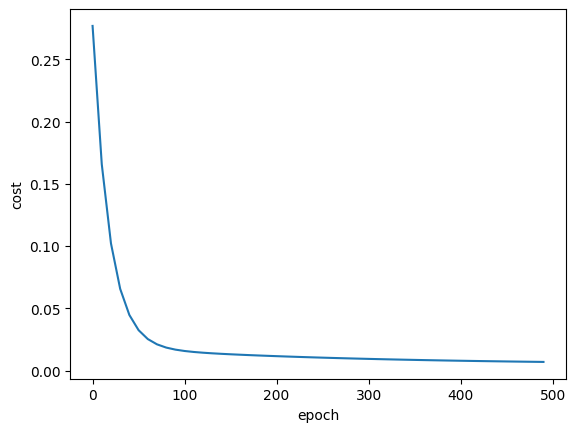

In [13]:
#plot graph
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [14]:
def predict(area,bedrooms,w,b):
      # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
      # equation for price is w1*area + w2*bedrooms + w3*age + bias
      # scaled_X[0] is area
      # scaled_X[1] is bedrooms
      # scaled_X[2] is age
      # scaling the values to the range of 0-1
    scaled_X = sx.transform([[area, bedrooms]])[0]
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to rescale it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,b)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

In [15]:
predict(1500,3,w,b)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


69.47860785714694

## **2. stochastic GD**<br>
works for random samples of training data

In [16]:
# we will use random libary to pick random training sample.
import random
random.randint(0,6) # randit gives random number between two numbers specified in the argument

6

In [18]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    #everything remains the same, only sample changes. all samples --> random samples

    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = X[random_index]
        sample_y = y_true[random_index]

        y_predicted = np.dot(w, sample_x.T) + b

        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.square(sample_y-y_predicted)

        # at every 100th iteration record the cost and epoch value
        if i%100==0:
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.70422643, 0.67538186]), -0.2302772787941431, 0.00030900740921939484)

w1 = 0.704, w2 = 0.675, bias = -0.230, MSE loss = 0.0003

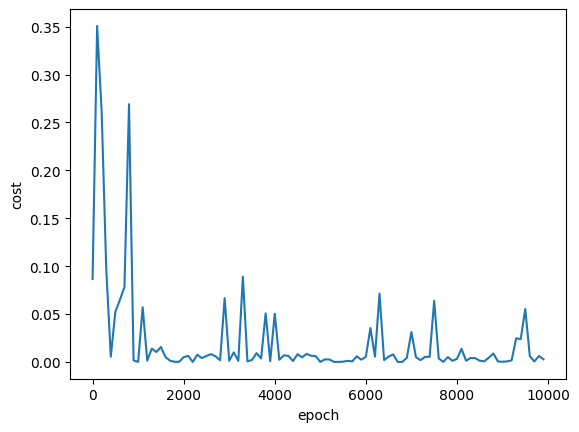

In [20]:
#plot graph
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [24]:
predict(2600,4,w_sgd,b_sgd)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.3042993468041

In [23]:
predict(1500,3,w_sgd,b_sgd)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


69.44891135734473

## **3. mini batch GD**<br>
works for few samples of training data<br>
we use a batch of m samples where 0 < m < n (where n is total number of training samples)

In [25]:
#generates an array of 20 numbers with random indexes

np.random.permutation(20)

array([11,  5,  3, 16,  0, 19, 17,  4,  2, 13,  7, 15, 18,  8, 14, 12,  1,
        6, 10,  9])

In [26]:
def mini_batch_gradient_descent(X, y_true, epochs = 100, batch_size = 5, learning_rate = 0.01):

    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0] # number of rows in X

    if batch_size > total_samples: # In this case mini batch becomes same as batch gradient descent
        batch_size = total_samples

    cost_list_mbgd = []
    epoch_list_mbgd = []

    num_batches = int(total_samples/batch_size)

    for i in range(epochs):
        random_indices = np.random.permutation(total_samples)
        X_tmp = X[random_indices]
        y_tmp = y_true[random_indices]

        for j in range(0,total_samples,batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            y_predicted = np.dot(w, Xj.T) + b

            w_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)

            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad

            cost = np.mean(np.square(yj-y_predicted)) # MSE (Mean Squared Error)

        if i%10==0:
            cost_list_mbgd.append(cost)
            epoch_list_mbgd.append(i)

    return w, b, cost, cost_list_mbgd, epoch_list_mbgd

w, b, cost, cost_list_mbgd, epoch_list_mbgd = mini_batch_gradient_descent(
    scaled_X,
    scaled_y.reshape(scaled_y.shape[0],),
    epochs = 120,
    batch_size = 5
)
w, b, cost

(array([0.71015443, 0.67816942]), -0.233189592738944, 0.0017379727822285584)

w1=0.710, w2=0.678, b=-0.233, loss=0.001

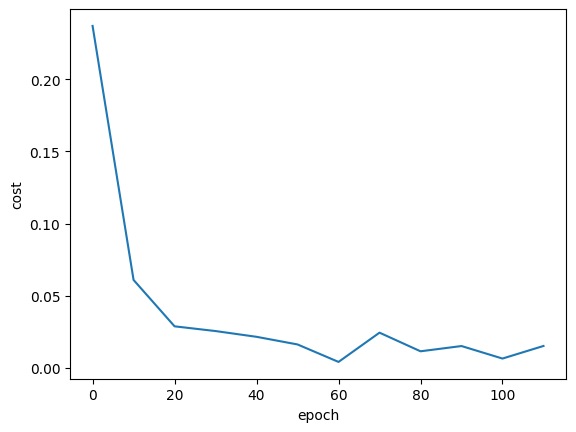

In [27]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_mbgd, cost_list_mbgd)

In [28]:
predict(2600,4,w,b)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.6901024035129

In [29]:
predict(1500,3,w,b)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


69.43708011849982